In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
x_axis = np.linspace(0, 0.95, 20) #grid point spaced 5cm apart in meters
x, y = np.meshgrid(x_axis, x_axis)
xy = np.vstack((x.flatten(),y.flatten())).T

sigma = 0.05
len(xy)

400

In [3]:
def activation(pos,firing_loc,sigma):
    return np.exp(-(pos-firing_loc)**2/(2*sigma**2))

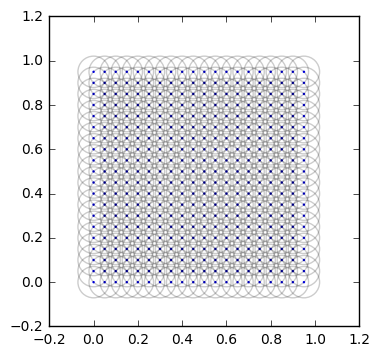

In [4]:
radius = np.sqrt(2)*sigma
fig, ax = plt.subplots() 

for i in range(xy.shape[0]):
    circle = plt.Circle(xy[i],radius, edgecolor=[0,0,0,0.2], facecolor="None")
    ax.add_artist(circle)
ax.scatter(xy[:,0], xy[:,1], s=3, edgecolor="None")
ax.set_aspect("equal")
plt.show()
# fig.savefig('plotcircles.png')

In [5]:
tau_plus, tau_min, k = 0.1, 0.3, 0.1
#differential equation for dynamical variables r_plus(=rp) and r_min(=rm:
drp = lambda rp, rm, t: 1/tau_plus*(h(t)-rp-rm)
drm = lambda rm, t: 1/tau_min*(h(t)-rm)
#actiation function/linear chirp:
h = lambda t: np.sin(np.pi*f(t)*t)
f = lambda t: k*t

#solution contains tau_plus in 0 and tau_min in 1
#we have to put both DEs into ones function for the ODE solver
def differential(solution, t):
    return drp(solution[0], solution[1], t), drm(solution[1],t)
rm_0, rp_0 = 0, 0
initial_values = np.array([rm_0, rp_0])

In [6]:
t = np.linspace(0, 10, 1000) #tshould be in seconds
dyn_var_solution = integrate.odeint(differential, initial_values, t)

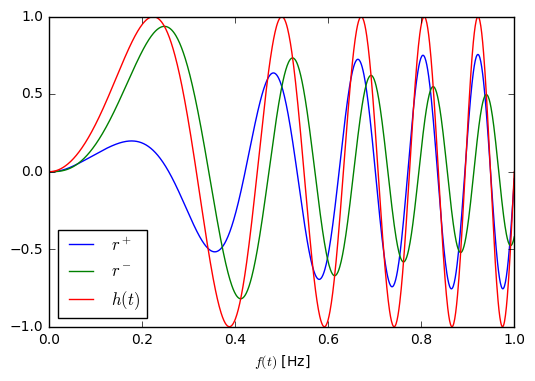

In [7]:
plt.plot(f(t), dyn_var_solution[:, 0], label=r'$r^+$')
plt.plot(f(t), dyn_var_solution[:, 1], label=r'$r^-$')
plt.plot(f(t), h(t), label=r'$h(t)$')
plt.legend(loc='best')
plt.xlabel('$f(t)$ [Hz]')
plt.show()

6

In [8]:
N_in, N_out = 400, 100
weights = np.random.uniform(size=(N_out,N_in))
normalization = np.sqrt(np.sum(weights**2,axis=1)) 
weights /= normalization[:, np.newaxis]

In [9]:
def forward_input(r_in,weights):
    return np.dot(weights,r_in)

In [10]:
r_in = activation(pos,firing_loc,sigma)
for t in np.arange(len(r_in)):
    h[t] = forward_input(r_in[t],weights)
    rp[t+1] = rp[t]+1/tau_plus*(h[t]-rp[t]-rm[t])
    rm[t+1] = rm[t]+1/tau_min*(h[t]-rm[t])
    r_out[i,t] = 2/np.pi*np.arctan(g*(rp[i,t]-mu))

NameError: name 'pos' is not defined